In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [187]:
x = tf.placeholder(tf.float32, [None, 784])
print "x -", x.get_shape()

x - (?, 784)


In [188]:
W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
print "W1 -", W1.get_shape()
print "b1 -", b1.get_shape()

W1 - (784, 256)
b1 - (256,)


In [189]:
u2 = tf.matmul(x, W1) + b1
z2 = tf.nn.relu(u2)
print "z2 -", z2.get_shape()

z2 - (?, 256)


In [190]:
W2 = tf.Variable(tf.random_normal([256, 10]))
b2 = tf.Variable(tf.random_normal([10]))
print "W2 -", W2.get_shape()
print "b2 -", b2.get_shape()

W2 - (256, 10)
b2 - (10,)


In [191]:
u3 = tf.matmul(z2, W2) + b2
#z3 = tf.nn.softmax(u3)
#print "z3 -", z3

In [192]:
z_ = tf.placeholder(tf.float32, [None, 10])

In [193]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(u3, z_)
#cross_entropy = reduce_mean(-tf.reduce_sum(z_ * tf.log(z3), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(cross_entropy)

In [194]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

training_epochs = 15
for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batch_images, batch_labels = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_images, z_: batch_labels})

[3 5 9 ..., 0 3 4]
[7 5 9 ..., 0 3 4]
0.9452
548
Error Index: 0, Prediction: 3, Ground Truth: 7
Error Index: 4, Prediction: 7, Ground Truth: 4
Error Index: 7, Prediction: 4, Ground Truth: 9
Error Index: 17, Prediction: 9, Ground Truth: 4
Error Index: 20, Prediction: 4, Ground Truth: 9


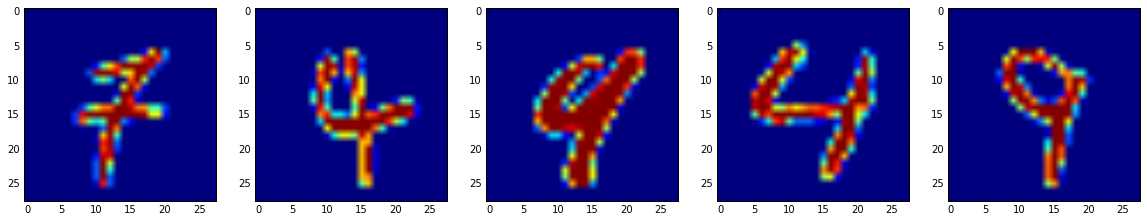

In [197]:
batch_x, batch_y = mnist.test.next_batch(10000)
prediction = sess.run(tf.argmax(u3, 1), feed_dict={x:batch_x})
ground_truth = sess.run(tf.argmax(z_, 1), feed_dict={z_:batch_y})

print prediction
print ground_truth

sum = 0
diff_index_list = []
for i in range(10000):
    if (prediction[i] == ground_truth[i]):
        sum = sum + 1
    else:
        diff_index_list.append(i)
        #print "%d - %d: %s" % (diff_a[i], diff_b[i], diff_a[i] == diff_b[i])

print sum / 10000.0
print len(diff_index_list)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 5))
for i in range(5):
    j = diff_index_list[i]
    print "Error Index: %s, Prediction: %s, Ground Truth: %s" % (j, prediction[j], ground_truth[j])
    img = np.array(mnist.test.images[j])
    img.shape = (28, 28)
    plt.subplot(150 + (i+1))
    plt.imshow(img)

In [179]:
prediction_ground_truth = tf.equal(tf.argmax(z3, 1), tf.argmax(z_, 1))
accuracy = tf.reduce_mean(tf.cast(prediction_ground_truth, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, z_: mnist.test.labels}))

0.098


In [182]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])


# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)
# pred = tf.nn.softmax(pred)
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
#cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), reduction_indices=[1]))
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
            # Compute average loss
            #avg_cost += c / total_batch
        # Display logs per epoch step
        #if epoch % display_step == 0:
        #    print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Optimization Finished!
('Accuracy:', 0.94580001)
